# Predicting the value of Foot Ball players


# 1.Load Libraries

 In this section we will load the required libraries for the analysis


In [1]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# For Missing Values
from sklearn.impute import SimpleImputer

# 2.Load Data

Let us load the data required for the analyis

In [2]:
import pandas as pd
fifa_raw_dataset = pd.read_csv("C:/Users/Hello/Documents/players_20.csv")
fifa_raw_dataset .head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# 3.Exploring the data

In this we are getting to know the knowledge about the variables in the dataset.

In [3]:
fifa_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [4]:
fifa_raw_dataset.shape

(18278, 104)

In [5]:
features = ['international_reputation', 'overall', 'potential','mentality_composure','age','height_cm','weight_kg','shooting','passing','dribbling','value_eur']
fifa_dataset = fifa_raw_dataset[[*features]]
fifa_dataset.head()

,international_reputation,overall,potential,mentality_composure,age,height_cm,weight_kg,shooting,passing,dribbling,value_eur
0,5,94,94,96,32,170,72,92.0,92.0,96.0,95500000
1,5,93,93,95,34,187,83,93.0,82.0,89.0,58500000
2,5,92,92,94,27,175,68,85.0,87.0,95.0,105500000
3,3,91,93,68,26,188,87,NaN,NaN,NaN,77500000
4,4,91,91,91,28,175,74,83.0,86.0,94.0,90000000


In [6]:
fifa_dataset.shape

(18278, 11)

In [7]:
fifa_dataset.describe()

,international_reputation,overall,potential,mentality_composure,age,height_cm,weight_kg,shooting,passing,dribbling,value_eur
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,16242.000000,16242.000000,16242.000000,1.827800e+04
mean,1.103184,66.244994,71.546887,58.528778,25.283291,181.362184,75.276343,52.298301,57.233777,62.531585,2.484038e+06
std,0.378861,6.949953,6.139669,11.880840,4.656964,6.756961,7.047744,14.029418,10.407844,10.284950,5.585481e+06
min,1.000000,48.000000,49.000000,12.000000,16.000000,156.000000,50.000000,15.000000,24.000000,23.000000,0.000000e+00
25%,1.000000,62.000000,67.000000,51.000000,22.000000,177.000000,70.000000,42.000000,50.000000,57.000000,3.250000e+05
50%,1.000000,66.000000,71.000000,60.000000,25.000000,181.000000,75.000000,54.000000,58.000000,64.000000,7.000000e+05
75%,1.000000,71.000000,75.000000,67.000000,29.000000,186.000000,80.000000,63.000000,64.000000,69.000000,2.100000e+06
max,5.000000,94.000000,95.000000,96.000000,42.000000,205.000000,110.000000,93.000000,92.000000,96.000000,1.055000e+08


# Discover and visualize the data to gain insights

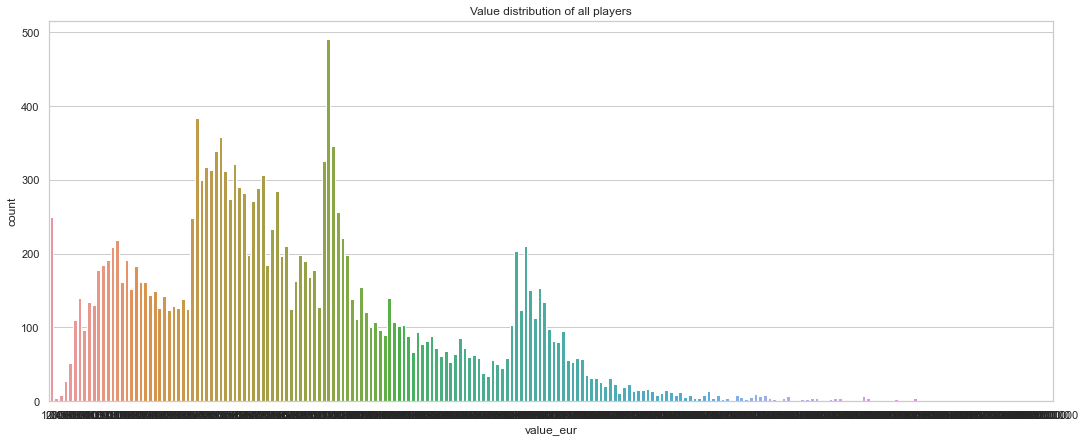

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'value_eur', data=fifa_dataset)
plt.title('Value distribution of all players')
plt.show()

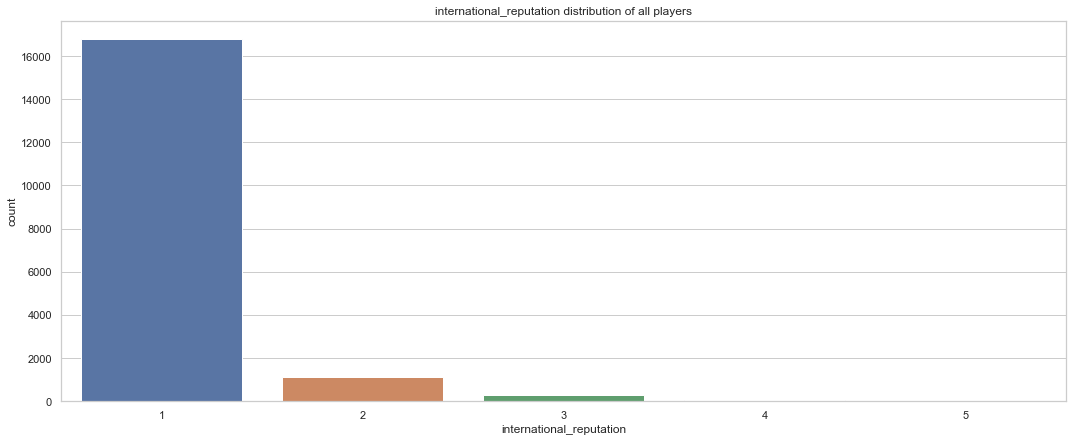

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'international_reputation', data=fifa_dataset)
plt.title('international_reputation distribution of all players')
plt.show()

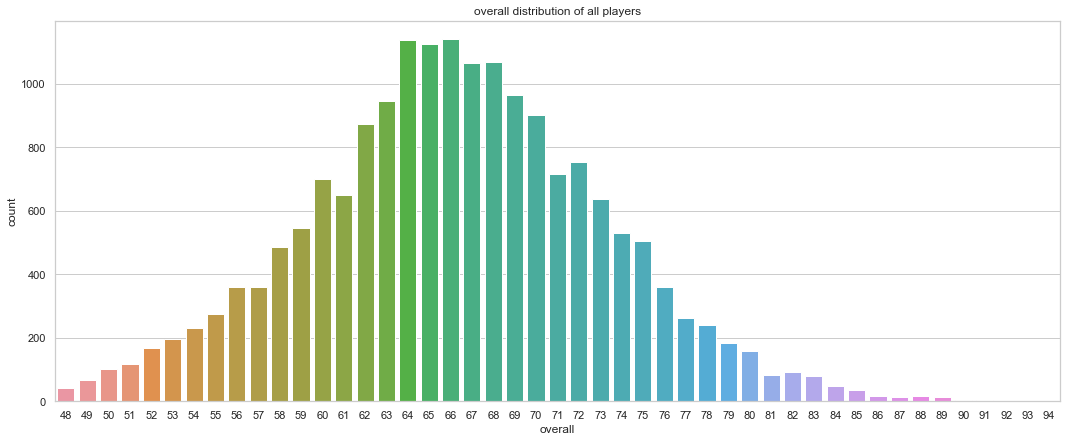

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'overall', data=fifa_dataset)
plt.title('overall distribution of all players')
plt.show()

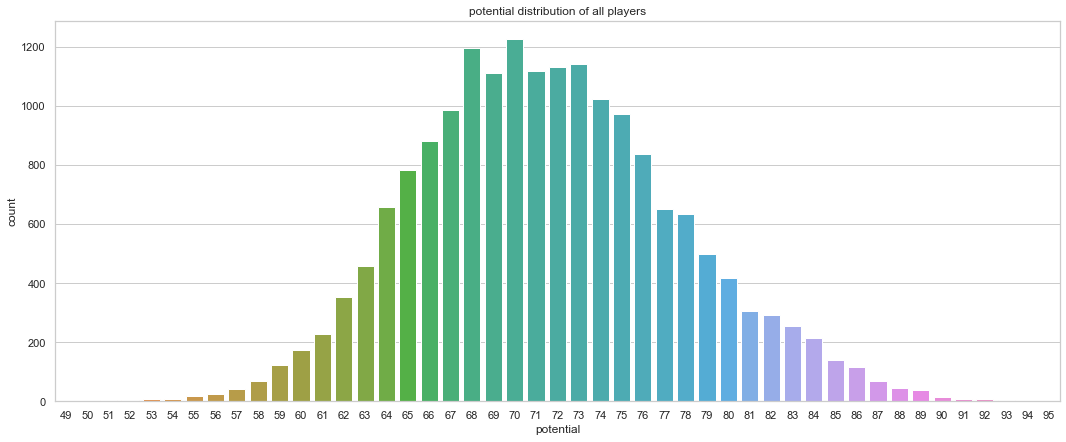

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'potential', data=fifa_dataset)
plt.title('potential distribution of all players')
plt.show()

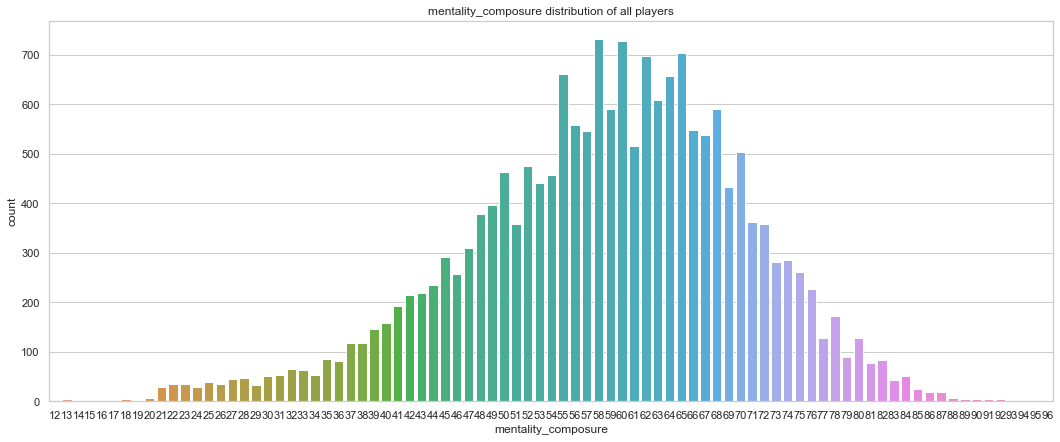

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'mentality_composure', data=fifa_dataset)
plt.title('mentality_composure distribution of all players')
plt.show()

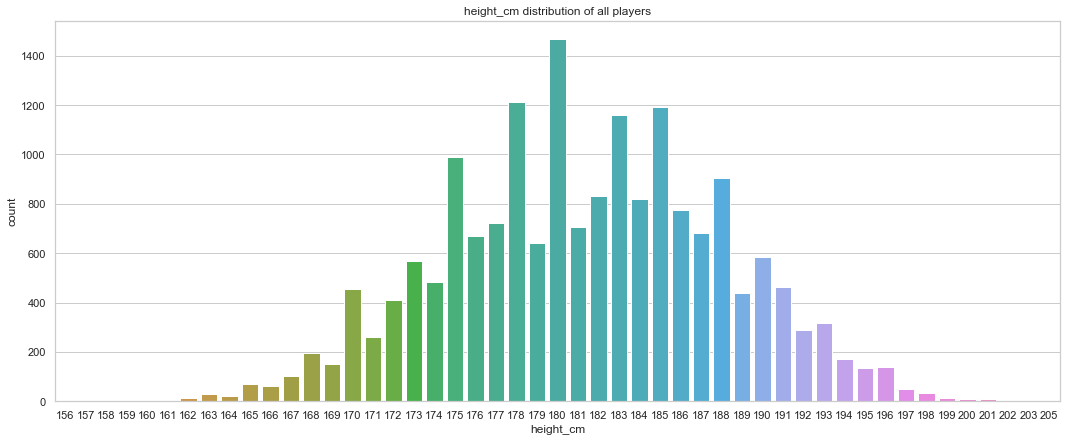

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'height_cm', data=fifa_dataset)
plt.title('height_cm distribution of all players')
plt.show()

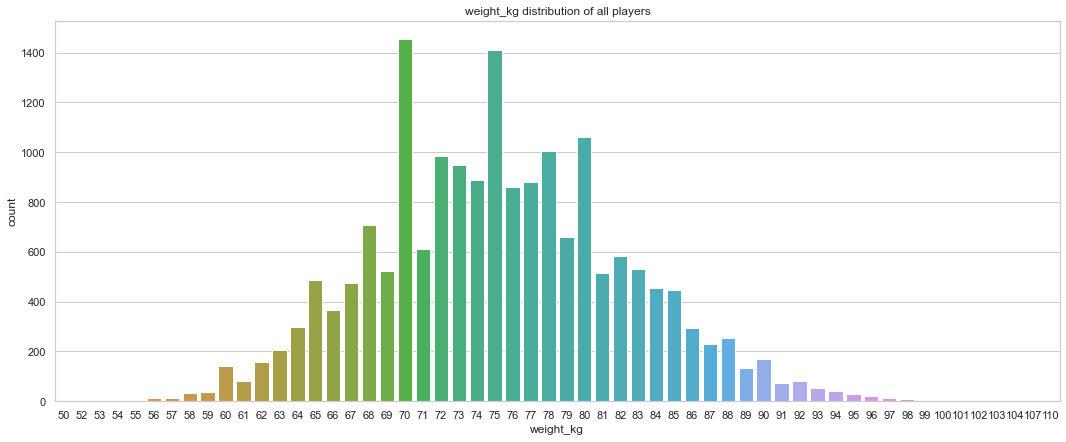

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'weight_kg', data=fifa_dataset)
plt.title('weight_kg distribution of all players')
plt.show()

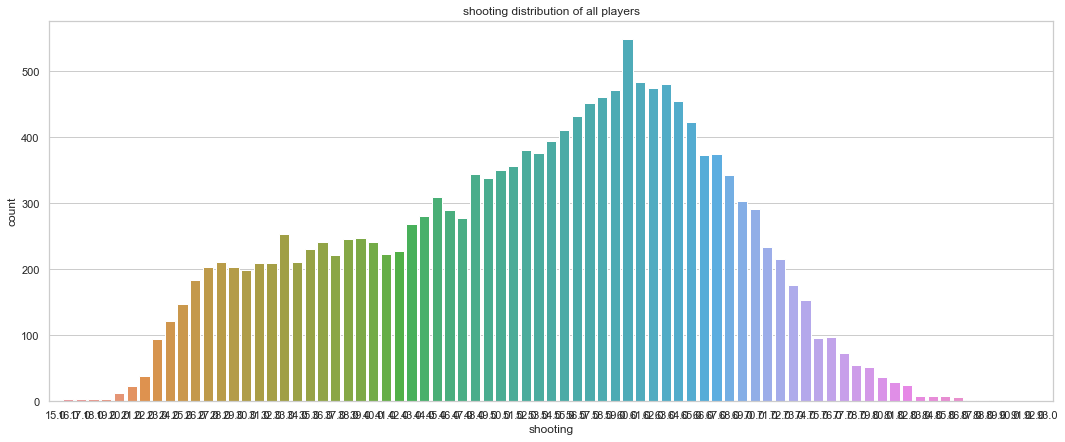

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'shooting', data=fifa_dataset)
plt.title('shooting distribution of all players')
plt.show()

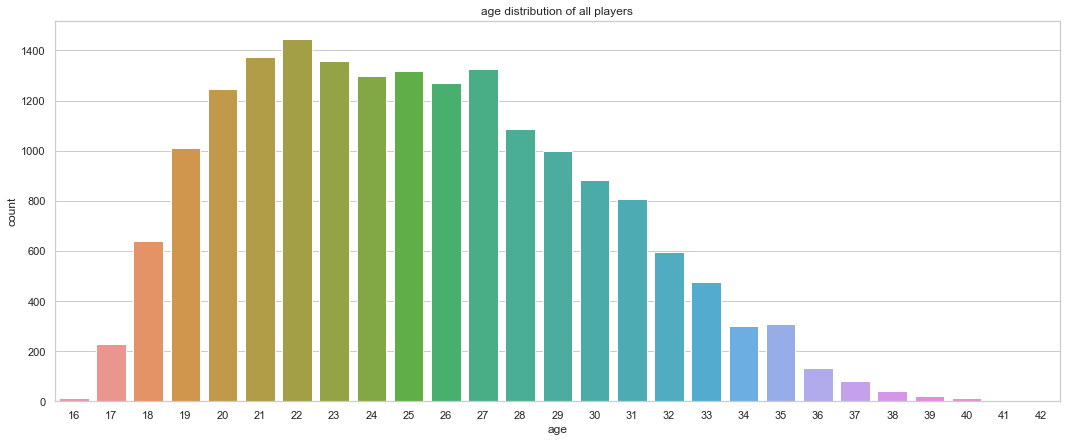

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'age', data=fifa_dataset)
plt.title('age distribution of all players')
plt.show()

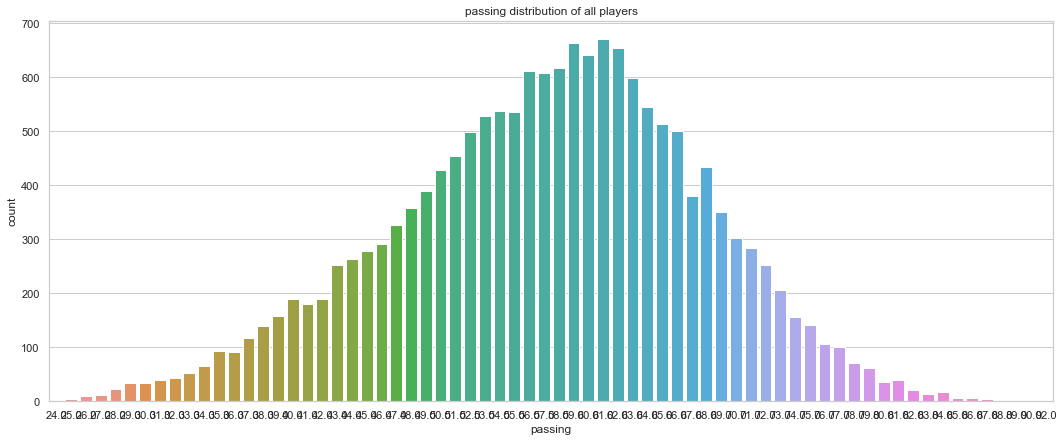

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'passing', data=fifa_dataset)
plt.title('passing distribution of all players')
plt.show()

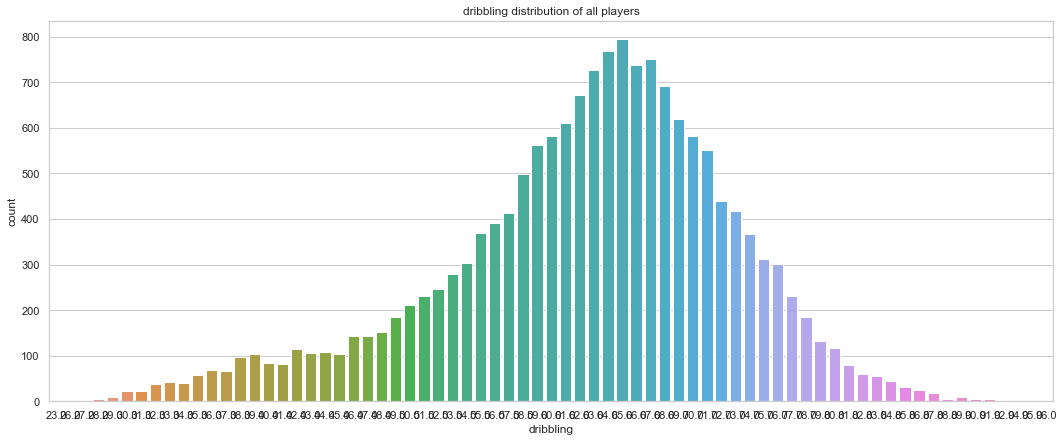

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(1, figsize=(18, 7))
sb.set(style="whitegrid")
sb.countplot( x= 'dribbling', data=fifa_dataset)
plt.title('dribbling distribution of all players')
plt.show()

# Find Correlations

In [19]:
corr_matrix = fifa_dataset.corr()
corr_matrix.shape

(11, 11)

In [20]:
corr_matrix["value_eur"].sort_values(ascending=False)

value_eur                   1.000000
overall                     0.638230
international_reputation    0.618133
potential                   0.580868
mentality_composure         0.457112
passing                     0.448258
dribbling                   0.427721
shooting                    0.343938
age                         0.081513
weight_kg                   0.051782
height_cm                   0.009527
Name: value_eur, dtype: float64

<AxesSubplot:>

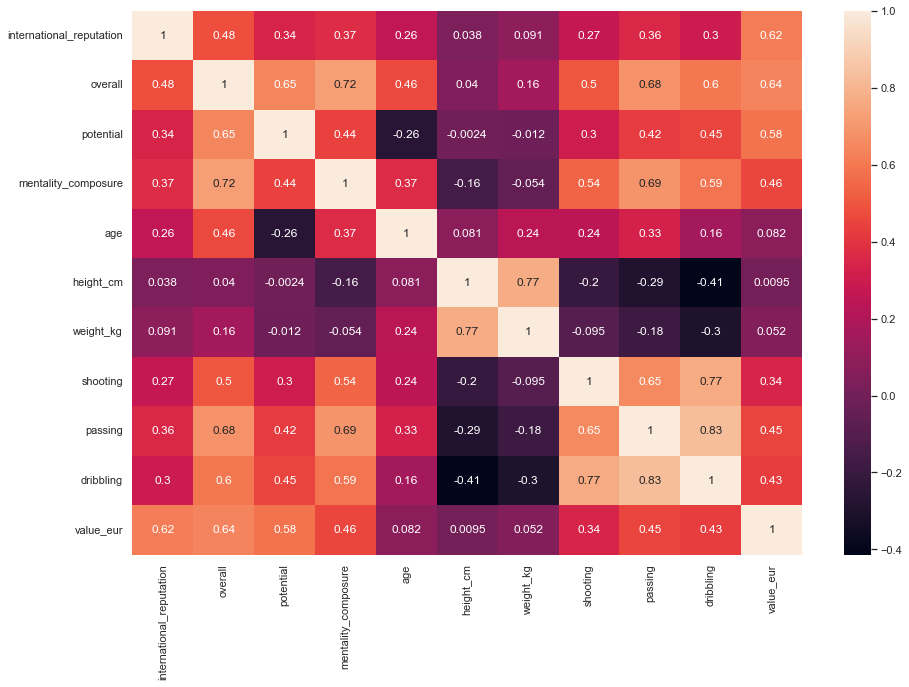

In [21]:
plt.figure(figsize=(15,10))
sb.heatmap(fifa_dataset.corr(), annot=True, cbar=True)

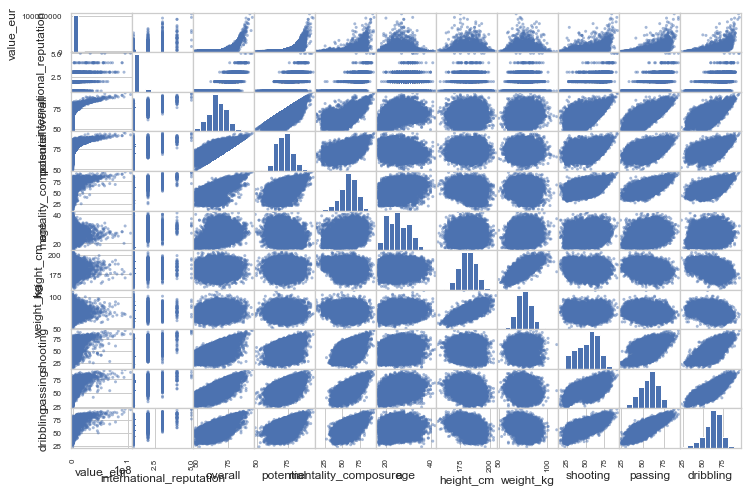

In [22]:
from pandas.plotting import scatter_matrix
attributes = ["value_eur", "international_reputation", "overall",
              "potential", "mentality_composure","age","height_cm","weight_kg","shooting","passing","dribbling"]
scatter_matrix(fifa_dataset[attributes], figsize=(12, 8))
plt.show()

# Prepare the data for Machine Learning algorithms

# Data Cleaning

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#l = list(train_set['value_eur'] == 0)
#print('Zeros in output label: ',len([v for v in l if v==True] ))
print('\nNaN values in following features:')
fifa_dataset.isnull().any()



NaN values in following features:


international_reputation    False
overall                     False
potential                   False
mentality_composure         False
age                         False
height_cm                   False
weight_kg                   False
shooting                     True
passing                      True
dribbling                    True
value_eur                   False
dtype: bool

In [24]:
import numpy as np
fifa_dataset = fifa_dataset.replace(0,np.nan)
fifa_dataset.head()

,international_reputation,overall,potential,mentality_composure,age,height_cm,weight_kg,shooting,passing,dribbling,value_eur
0,5,94,94,96,32,170,72,92.0,92.0,96.0,95500000.0
1,5,93,93,95,34,187,83,93.0,82.0,89.0,58500000.0
2,5,92,92,94,27,175,68,85.0,87.0,95.0,105500000.0
3,3,91,93,68,26,188,87,NaN,NaN,NaN,77500000.0
4,4,91,91,91,28,175,74,83.0,86.0,94.0,90000000.0


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
imputer.fit(fifa_dataset)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([1.00e+00, 6.60e+01, 7.10e+01, 6.00e+01, 2.50e+01, 1.81e+02,
       7.50e+01, 5.40e+01, 5.80e+01, 6.40e+01, 7.25e+05])

In [28]:
tf = imputer.transform(fifa_dataset)

In [29]:
fifa_dataset_tf = pd.DataFrame(tf, columns=fifa_dataset.columns)

In [30]:
fifa_dataset_tf.head()

,international_reputation,overall,potential,mentality_composure,age,height_cm,weight_kg,shooting,passing,dribbling,value_eur
0,5.0,94.0,94.0,96.0,32.0,170.0,72.0,92.0,92.0,96.0,95500000.0
1,5.0,93.0,93.0,95.0,34.0,187.0,83.0,93.0,82.0,89.0,58500000.0
2,5.0,92.0,92.0,94.0,27.0,175.0,68.0,85.0,87.0,95.0,105500000.0
3,3.0,91.0,93.0,68.0,26.0,188.0,87.0,54.0,58.0,64.0,77500000.0
4,4.0,91.0,91.0,91.0,28.0,175.0,74.0,83.0,86.0,94.0,90000000.0


In [31]:
fifa_dataset_tf.isnull().any()

international_reputation    False
overall                     False
potential                   False
mentality_composure         False
age                         False
height_cm                   False
weight_kg                   False
shooting                    False
passing                     False
dribbling                   False
value_eur                   False
dtype: bool

# Creating the test set

In [32]:
import numpy as np
np.random.seed(42)

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fifa_dataset_tf, test_size=0.2, random_state=42)

In [34]:
print('Train',' ','Test')
print(len(train_set),'+',len(test_set),'=',len(train_set)+len(test_set))

Train   Test
14622 + 3656 = 18278


# Seperate the Features and Label

In [35]:
fifa_dataset_features = fifa_dataset_tf.drop("value_eur", axis=1) # drop labels for training set #train X
fifa_dataset_labels = fifa_dataset_tf["value_eur"].copy()  #train y

In [36]:
X_test=test_set.drop("value_eur", axis=1)
Y_test=test_set["value_eur"].copy()

# Select and train a model

Before directly training on the test set, first train and evaluate on the training set. Also, try different ML algorithms and choose which fits best on the data.

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(fifa_dataset_features, fifa_dataset_labels)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error
fifa_dataset_predictions = lin_reg.predict(X_test) #x_test
lin_mse = mean_squared_error(Y_test, fifa_dataset_predictions) #y_test
lin_rmse = np.sqrt(lin_mse)
#lin_rmse
print(f"MSE for Linear Regression is {lin_mse} and RMSE is {lin_rmse}")

MSE for Linear Regression is 11420528327907.527 and RMSE is 3379427.2189096673


In [39]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, fifa_dataset_predictions)#y_test
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 61.06 %


# Decision Trees

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(fifa_dataset_features, fifa_dataset_labels)

DecisionTreeRegressor(random_state=42)

In [41]:
fifa_dataset_predictions = tree_reg.predict(X_test)#X_TEST
tree_mse = mean_squared_error(Y_test, fifa_dataset_predictions)#Y_TEST
tree_rmse = np.sqrt(tree_mse)


In [42]:
print(f'MSE for Decision tree is {tree_mse} & RMSE is {tree_rmse}')

MSE for Decision tree is 11882137240.153173 & RMSE is 109005.21657312174


In [43]:
score = r2_score(Y_test, fifa_dataset_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.96 %


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(fifa_dataset_features, fifa_dataset_labels)

RandomForestRegressor(random_state=42)

In [45]:
fifa_dataset_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(Y_test, fifa_dataset_predictions)
forest_rmse = np.sqrt(forest_mse)


In [46]:
print(f'MSE for Random Forest is {forest_mse} & RMSE is {forest_rmse}')

MSE for Random Forest is 110819470979.84944 & RMSE is 332895.5857019577


In [47]:
score = r2_score(Y_test, fifa_dataset_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

Accuracy: 99.62 %


# Evaluation using Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, fifa_dataset_features, fifa_dataset_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [12699953.24054199  1415236.96534533   807490.69339063   217028.71549157
   169254.94798659   105004.03764249   134457.38467342   132852.99373032
   113354.8830087     97815.07411787]
Mean: 1589244.8935928908
Standard deviation: 3726012.2954035522


In [50]:
lin_scores = cross_val_score(lin_reg, fifa_dataset_features, fifa_dataset_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [14553521.14304421  3040420.02190335  2542755.49177632  2283774.46498572
  1843243.86187414  1485817.88007214  1482422.68333908  1709708.48657449
  1615014.13338827  4579012.84428692]
Mean: 3513569.101124463
Standard deviation: 3789197.7606368023


In [52]:
forest_scores = cross_val_score(forest_reg, fifa_dataset_features, fifa_dataset_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [12895028.90526043  1218411.41286971   746613.81146181   207422.48101513
   156347.97717211    94689.97262083   127054.09490988    76652.54309701
    93277.11550953    75536.54508155]
Mean: 1569103.485899798
Standard deviation: 3792304.4608677984


# Fine-Tune the Model

# Grid Search


In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(fifa_dataset_features, fifa_dataset_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 10}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=10, random_state=42)

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5199507.015784247 {'max_features': 2, 'n_estimators': 3}
5209079.108771175 {'max_features': 2, 'n_estimators': 10}
5237400.895950599 {'max_features': 2, 'n_estimators': 30}
5154628.23896569 {'max_features': 3, 'n_estimators': 3}
5135247.274448318 {'max_features': 3, 'n_estimators': 10}
5138343.702073665 {'max_features': 3, 'n_estimators': 30}
5050392.2905761525 {'max_features': 4, 'n_estimators': 3}
5038522.07290212 {'max_features': 4, 'n_estimators': 10}
5065208.5724543845 {'max_features': 4, 'n_estimators': 30}
5245193.608817306 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5246187.429376175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5126581.863215419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5159782.335047553 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
5109211.401039765 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
5109976.435028201 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


# Evaluate the model on the Test Set

In [57]:
test_set = test_set.replace(0, np.nan)
tf = imputer.transform(test_set)
fifa_dataset_tf = pd.DataFrame(tf, columns=fifa_dataset.columns)

In [58]:
fifa_dataset_features = fifa_dataset_tf.drop("value_eur", axis=1)
fifa_dataset_labels = fifa_dataset_tf["value_eur"].copy()

In [59]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(fifa_dataset_features)

final_mse = mean_squared_error(fifa_dataset_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

408718.63483215007

In [60]:
final_model_score = r2_score(fifa_dataset_labels, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')

Accuracy: 99.43 %
